# Preprocessing

## Import pakcages

In [1]:
import os
import sys
import copy
import numpy as np

In [2]:
import ConsTADs

In [3]:
from ConsTADs import source
from ConsTADs import Preprocess as pre
from ConsTADs import TadSeparationLandscape as TSL
from ConsTADs import IdentifyBoundaryRegions as IBR
from ConsTADs import GetConsTADs as GCT
from ConsTADs import ConsTADs_main as main
from ConsTADs import PlotFunction as PF

# Build TAD separation landscape and get ConsTADs

## paramaters setting

In [4]:
sample = 'GM12878_MboI'
#sample = 'K562_MboI'
# Note: the TAD_caller_result_add and mat_file should use your own results
# Step 1,2 paramaters
TAD_caller_result_add = '/home/dcdang/ConsTADs/TAD_caller_result/' + sample + '/chr2_method_result'
target_chr = 'chr2'
resolution = 50000
chr_size = 243199373
method_list = ['3DNetMod', 'CaTCH', 'CHDF', 'ClusterTAD', 
               'deDoc', 'DI', 'GMAP', 'HiCDB', 'HiCseg', 
               'HiTAD', 'ICFinder', 'IS', 'MSTD', 'OnTAD',
               'Spectral','TopDom']

# Step 3 paramaters
mat_file = '/mnt/disk2/ddc/project/ConsTADs/hic_mat/' + 'Rao2014_' + sample + '_50kb_chr2_iced_sparse.txt'

mat_type = 'sparse'
mat_norm_check = False
window_list = [100000, 150000, 200000, 300000, 400000, 500000, 600000, 800000, 1000000, 2000000] 
p_cut = 0.05
high_score_cut = 5
combine_dist = 2

# Step 4 paramaters
K = 3
color_bd = ['#D65F4D', '#459457', '#4392C3']

# Step 5 paramaters
weight = 0.5

## Main process

In [5]:
## Information of the input and output of the main process of ConsTADs
help(main.ConsTADs)

Help on function ConsTADs in module ConsTADs.ConsTADs_main:

ConsTADs(TAD_caller_result_add, target_chr, resolution, chr_size, method_list, mat_file, mat_type, window_list, mat_norm_check=False, p_cut=0.05, high_score_cut=5, combine_dist=2, K=3, color_bd=['#D65F4D', '#459457', '#4392C3'], weight=0.5)
    Parameters
    ----------
    TAD_caller_result_add : str
        Path of fold containing results of multiple TAD callers.
    target_chr : str
        Symbol of target chromosome, eg: chr2.
    resolution : int
        Resolution of Hi-C contact map.
    chr_size : int
        Length of target chromosome in base pair.
    method_list : list
        List of TAD caller names.
    mat_file : str
        Path of file for Hi-C contact map of target chr.
    mat_type : str
        Type of Hi-C contact map file, dense or sparse.
    window_list : list
        List of window size for calculating multi-scale contrast p-value. These sizes are lengths in base pair. 
    mat_norm_check : bool, op

Step 1: Preprocess of TAD caller results...
Done!
Step 2: Boundary voting...
Done!
Step 3: Build TAD separation landscape...
Load Hi-C matrix...
Normalize the Hi-C matrix...
Calculate multi-scale contrast pvalue...
Best window size:200kb-window
Building TAD seperation landscape...
Operation 1: Add
Add score for 69 bins
Operation 2: Filter
Operation 3: Combine
Done!
Step 4: Identify three types of boundary regions...
Length cut-off:5.0
Score cut-off:5.0
Boundary region types: Narrow-strong, Number: 239
Boundary region types: Narrow-weak, Number: 269
Boundary region types: Wide, Number: 93


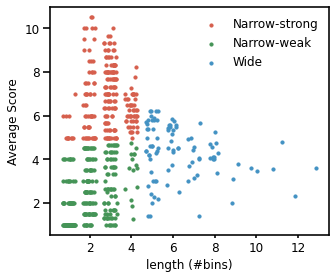

Done!
Step 5: Get ConsTADs based on TAD separation landscape...
Get 600 ConsTADs
Done!


<Figure size 432x288 with 0 Axes>

In [6]:
TAD_caller_result_all, mat_dense, mat_norm, result_record, w_best, df_bd_insul_pvalue, df_pvalue_score_cor, df_boundary_region_with_types, df_tad_cons, df_boundary_cons = main.ConsTADs(TAD_caller_result_add, 
             target_chr, resolution, chr_size, method_list, mat_file, mat_type, window_list, mat_norm_check = mat_norm_check, 
             p_cut = p_cut, high_score_cut = high_score_cut, combine_dist = combine_dist, K = K, color_bd = color_bd, weight = weight)

## Results saving

In [15]:
save_add = '/mnt/disk2/ddc/project/ConsTADs/result_save_jupyter'
save_file = save_add + '/' + sample + '_' + target_chr + '_' + str(int(resolution / 1000)) + 'kb' + '_ConsTADs_results_all.pkl'


In [16]:
sample_res_all = {}
sample_res_all['TAD_caller_results'] = TAD_caller_result_all
sample_res_all['Hi-C_map'] = mat_dense
sample_res_all['TSL'] = result_record
sample_res_all['Contrast_pvalue'] = df_bd_insul_pvalue
sample_res_all['boundary_region'] = df_boundary_region_with_types
sample_res_all['ConsTADs'] = df_tad_cons
sample_res_all['ConsTADs_bd'] = df_boundary_cons

In [17]:
source.SaveData(save_file, sample_res_all)

# Results display

## TAD separation landscape and multi-scale contrast P-value

In [7]:
Chr = target_chr
bd_cell_score_original = result_record['Original']['TAD_score']
bd_cell_score_refined = result_record['Combine']['TAD_score']
df_bd_pvalue_result = df_bd_insul_pvalue
w_list = ['200kb-window', '400kb-window', '800kb-window', '1000kb-window']
p_cut = 0.05
save_name = ''
st = 750
ed = 820
fgsize = (5, 10)

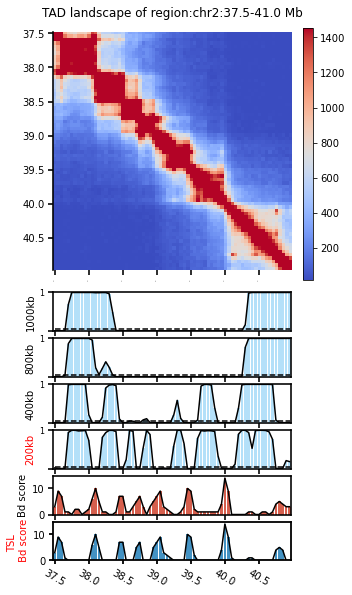

In [8]:
# Note: The best window size for contrast P-value is colored in red. 
# Note: The TAD separation landscape (TSL) is colored in red. 
PF.DrawBdScoreMultiScalePvalue(mat_dense, Chr, st, ed, bd_cell_score_original, bd_cell_score_refined, df_bd_pvalue_result, 
                               w_list, resolution, save_name, p_cut, target_site = [], fgsize = fgsize, bin_size = 10)


## ConsTADs with annotated boundary region types

In [9]:
Chr = target_chr
bd_score_cell = result_record['Combine']['TAD_score']
symbol_dic = {'No-bd':0, 'Narrow-weak':1, 'Narrow-strong':2, 'Wide':3}
bd_symbol = PF.get_bd_type_symbol(df_boundary_region_with_types, bd_score_cell, symbol_dic)
fgsize = (6, 7)
st = 750
ed = 820
TAD_list = []
for i in range(len(df_tad_cons)):
    tad_st = df_tad_cons['bd_st'][i]
    tad_ed = df_tad_cons['bd_ed'][i]
    if tad_st >= st and tad_ed <= ed:
        TAD_list.append((tad_st, tad_ed))


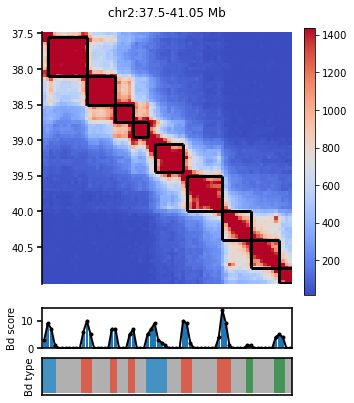

In [10]:
# Note: The black frames represent the ConsTADs and the boundary regions types are shown below. 
#       Wide: blue, Narrow-strong: red, Narrow-weak: green
PF.DrawConsTADsAndBdRegion(mat_dense, Chr, st, ed, TAD_list, bd_score_cell, bd_symbol, resolution, 
                           fgsize = fgsize, save_name = '', bin_size = 10)


## Comparison of TAD separation landscape between cell types

In [11]:
save_add = '/mnt/disk2/ddc/project/ConsTADs/result_save_jupyter'
Chr = target_chr = 'chr2'
resolution = 50000
sample1 = 'GM12878_MboI'
sample_res_all_1 = source.ReadSaveData(save_add + '/' + sample1 + '_' + target_chr + '_' + str(int(resolution / 1000)) + 'kb' + '_ConsTADs_results_all.pkl')
sample2 = 'K562_MboI'
sample_res_all_2 = source.ReadSaveData(save_add + '/' + sample2 + '_' + target_chr + '_' + str(int(resolution / 1000)) + 'kb' + '_ConsTADs_results_all.pkl')

In [12]:
cell_1 = 'GM12878'
bd_score_cell_1 = sample_res_all_1['TSL']['Combine']['TAD_score']
df_tad_cons_1 = sample_res_all_1['ConsTADs']
mat_dense1 = sample_res_all_1['Hi-C_map']

cell_2 = 'K562'
bd_score_cell_2 = sample_res_all_2['TSL']['Combine']['TAD_score']
df_tad_cons_2 = sample_res_all_2['ConsTADs']
mat_dense2 = sample_res_all_2['Hi-C_map']

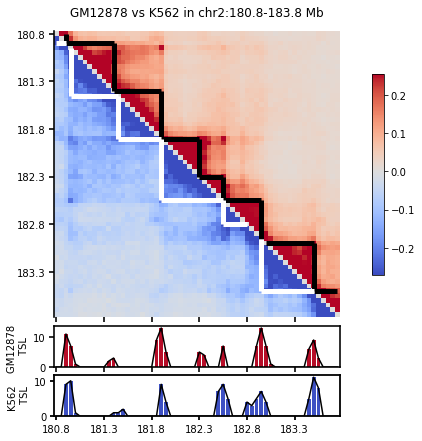

In [13]:
## Region around a GM12878-gained boundary region (K562-lost)
st = 3646 - 30
ed = 3646 + 30
figsize = (6, 8)
TAD_list_1 = PF.get_tad_list_in_target_ranges(st, ed, df_tad_cons_1, pos_type = 'cord', resolution = resolution)
TAD_list_2 = PF.get_tad_list_in_target_ranges(st, ed, df_tad_cons_2, pos_type = 'cord', resolution = resolution)
PF.DrawPairWiseMapCompare(cell_1, cell_2, mat_dense1, mat_dense2, Chr, st, ed, bd_score_cell_1, bd_score_cell_2, 
                          TAD_list_1, TAD_list_2, resolution, figsize = figsize, TAD_color_1 = 'black', TAD_color_2 = 'white', 
                          target_site = [], save_name = '', bin_size = 10) 


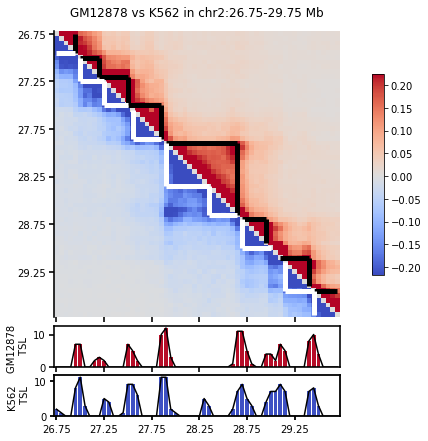

In [14]:
## Region around a GM12878-lost boundary region (K562-gained)
st = 565 - 30
ed = 565 + 30 

figsize = (6, 8)
TAD_list_1 = PF.get_tad_list_in_target_ranges(st, ed, df_tad_cons_1, pos_type = 'cord', resolution = resolution)
TAD_list_2 = PF.get_tad_list_in_target_ranges(st, ed, df_tad_cons_2, pos_type = 'cord', resolution = resolution)
PF.DrawPairWiseMapCompare(cell_1, cell_2, mat_dense1, mat_dense2, Chr, st, ed, bd_score_cell_1, bd_score_cell_2, 
                          TAD_list_1, TAD_list_2, resolution, figsize = figsize, TAD_color_1 = 'black', TAD_color_2 = 'white', 
                          target_site = [], save_name = '', bin_size = 10) 
